In [1]:
!curl -L -O https://raw.githubusercontent.com/Deval2211/College-ML-projects/master/Dataset/insurance.csv
!pip install XGBoost

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 55628  100 55628    0     0   221k      0 --:--:-- --:--:-- --:--:--  220k


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score , root_mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [6]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
label = LabelEncoder()
df["sex"] = (df.sex == "male").astype(int)
df["smoker"] = (df.smoker == "yes").astype(int)
df["region"] = label.fit_transform(df['region'])
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [8]:
mean_charges = df['charges'].mean()
above = (df['charges'] >= mean_charges).sum()
below = (df['charges'] < mean_charges).sum()

print(f"Above/equal to mean: {above}")
print(f"Below mean:          {below}")


Above/equal to mean: 420
Below mean:          918


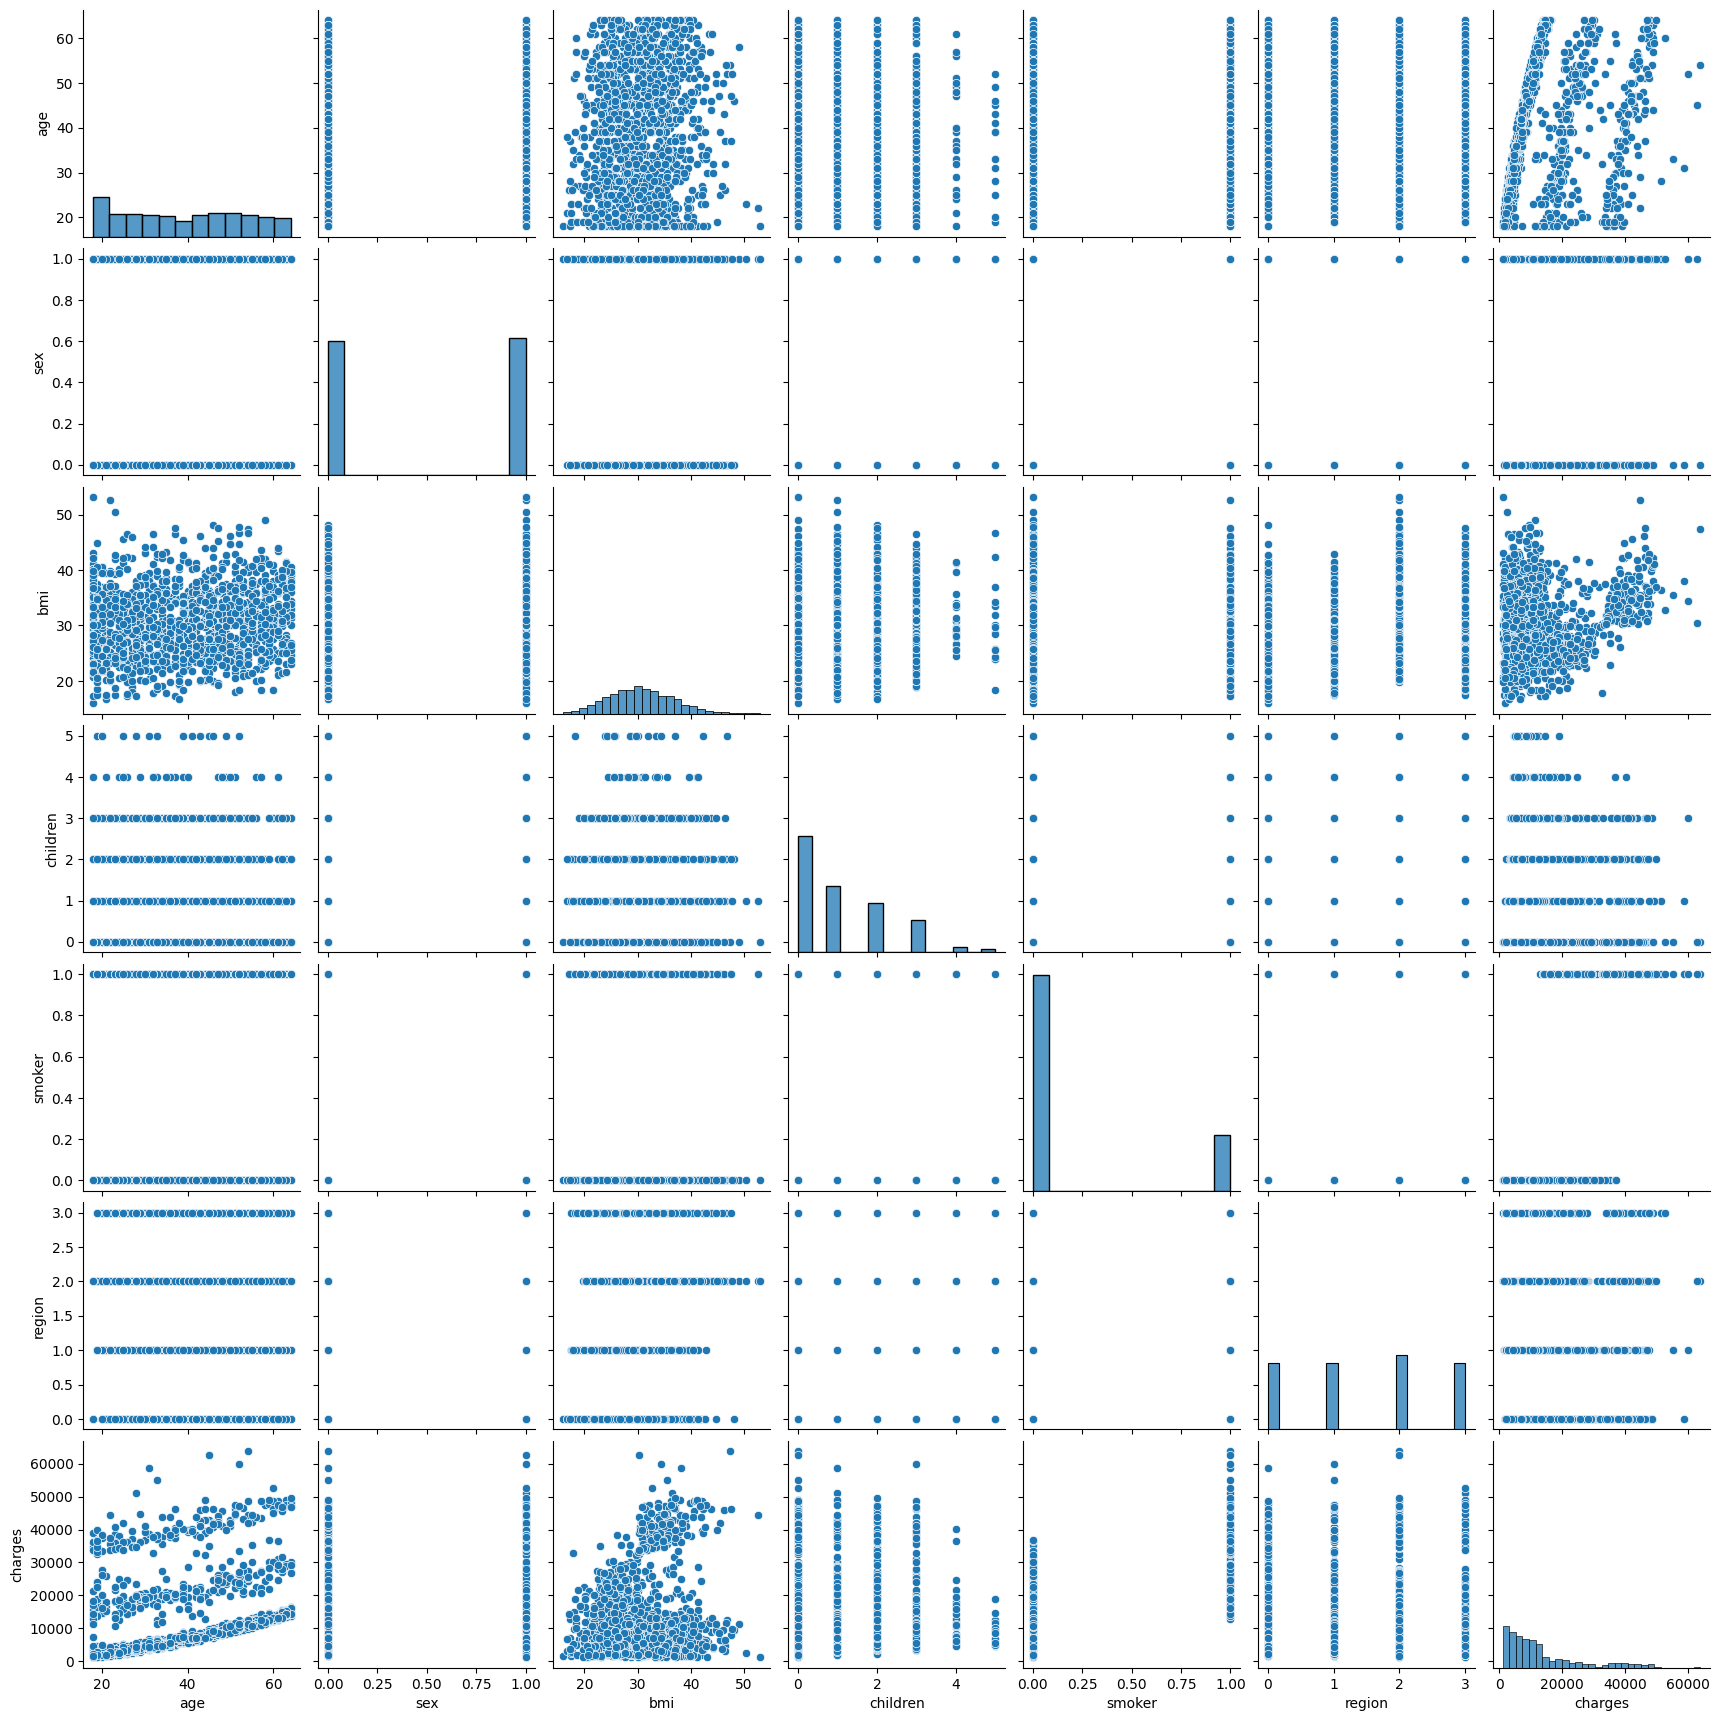

In [9]:
sns.pairplot(df)

<Axes: >

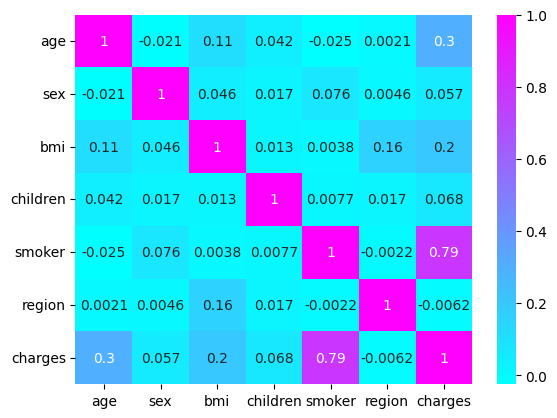

In [10]:
sns.heatmap(df.corr(),cmap="cool", annot=True)

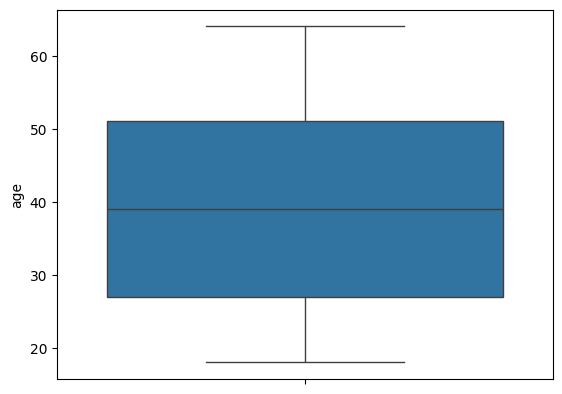

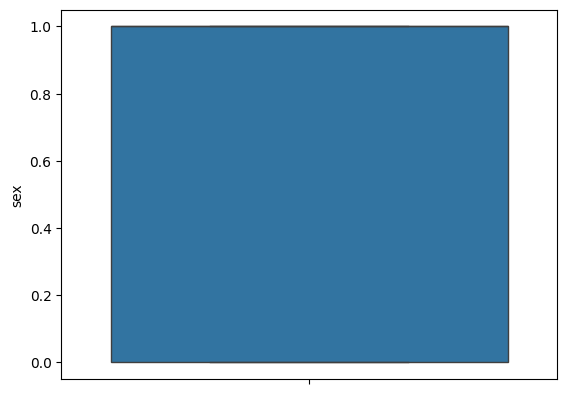

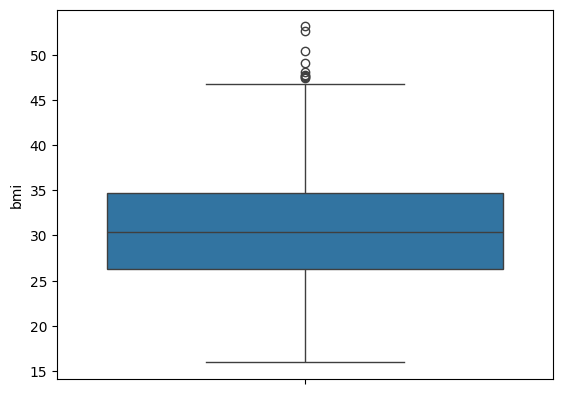

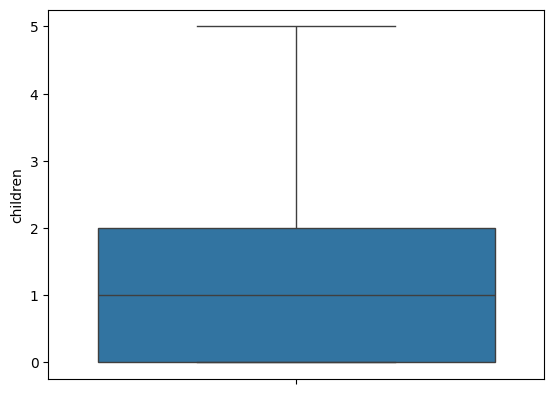

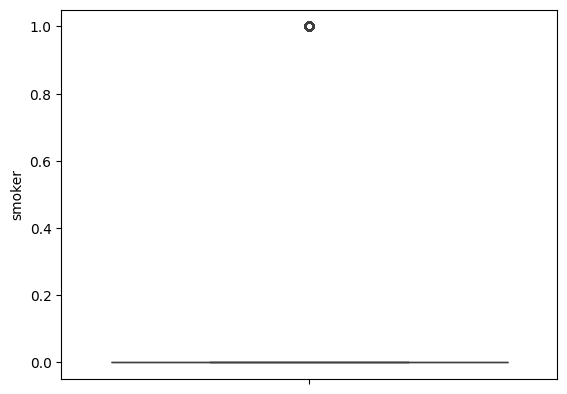

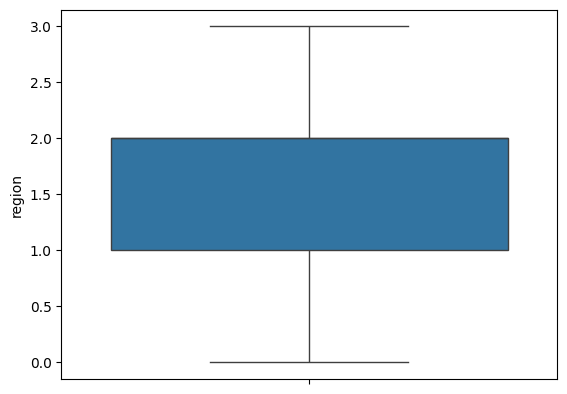

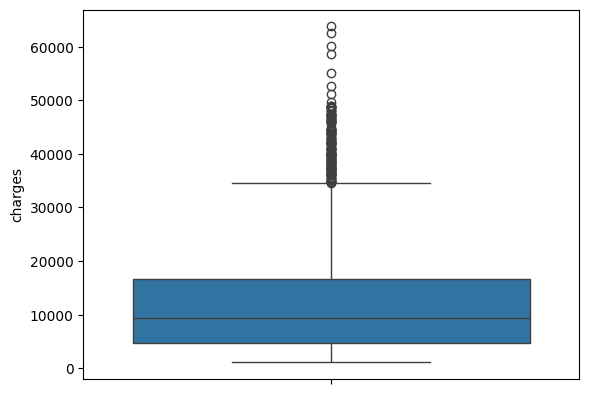

In [11]:
for col in df.columns:
  plt.figure()
  sns.boxplot(df[col])

In [12]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [13]:
X['smoker'].value_counts()

,count
smoker,
0,1064
1,274


In [14]:
X['region'].value_counts()

,count
region,
2,364
3,325
1,325
0,324


In [15]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))

0.7833463107364536


In [18]:
print("Linear Regression Metrics:")
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Linear Regression Metrics:
RMSE: 5799.5870914383595
R2 Score: 0.7833463107364536


## Decision Tree Regression

In [19]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Regression Metrics:")
print("RMSE:", root_mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))

Decision Tree Regression Metrics:
RMSE: 6881.159914223066
R2 Score: 0.6950032292687722


## Random Forest Regression

In [20]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Regression Metrics:")
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Regression Metrics:
RMSE: 4563.760861975148
R2 Score: 0.8658416529065179


## XGBoost Regression

In [26]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Regression Metrics:")
print("RMSE:", root_mean_squared_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))

XGBoost Regression Metrics:
RMSE: 4822.991168492682
R2 Score: 0.8501678977480663


## Model Comparison

In [23]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
rmse_scores = [
    root_mean_squared_error(y_test, y_pred),
    root_mean_squared_error(y_test, y_pred_dt),
    root_mean_squared_error(y_test, y_pred_rf),
    root_mean_squared_error(y_test, y_pred_xgb)
]
r2_scores = [
    r2_score(y_test, y_pred),
    r2_score(y_test, y_pred_dt),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_xgb)
]

results_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_scores,
    'R2 Score': r2_scores
})

display(results_df.sort_values(by='R2 Score', ascending=False))

,Model,RMSE,R2 Score
2,Random Forest,4563.760862,0.865842
3,XGBoost,4822.991168,0.850168
0,Linear Regression,5799.587091,0.783346
1,Decision Tree,6881.159914,0.695003


In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search_rf.best_params_)
print("Best R2 score:", grid_search_rf.best_score_)

# Get the best model from the grid search
best_rf_model = grid_search_rf.best_estimator_

# Make predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best model
print("\nBest Random Forest Model Metrics (after GridSearchCV):")
print("RMSE:", root_mean_squared_error(y_test, y_pred_best_rf))
print("R2 Score:", r2_score(y_test, y_pred_best_rf))

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best R2 score: 0.8421340160399085

Best Random Forest Model Metrics (after GridSearchCV):
RMSE: 4363.47762811248
R2 Score: 0.8773585018822069
